# 作业7-机器学习-实战流程练习
**作业要求：**

- 在Python Jupyter中回答，**需运行出结果**。
- 网页-打印-另存为pdf，命名：**作业7-班级-学号后两位-姓名.pdf**
- 按时上传职教云，**过期不补**。

### 我们的任务：预测一个人的收入能否超过五万美元，超过：1，未超过：0

#### 数据说明：（adult.csv)
    - age 年龄 
    - workclass 工作类型 
    - fnlwgt 序号 
    - education_num 受教育时间 
    - maritial_status 婚姻状况 
    - relationship 关系 
    - race 种族 
    - sex 性别 
    - capital_gain 资本收益 
    - capital_loss 资本损失 
    - hours_per_week 每周工作小时数 
    - predclass 收入 (目标，需转换0/1)

In [1]:
#导入包
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#数据加载
data = pd.read_csv('./data/adult.csv')
# 查看训练集数据预览
data.head()

,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,predclass
0,39.0,State-gov,77516,13.0,Never-married,Not-in-family,White,Male,2174,0,40,<=50K
1,50.0,Self-emp-not-inc,83311,13.0,Married-civ-spouse,Husband,White,Male,0,0,13,<=50K
2,38.0,Private,215646,9.0,Divorced,Not-in-family,White,Male,0,0,40,<=50K
3,53.0,Private,234721,7.0,Married-civ-spouse,Husband,Black,Male,0,0,40,<=50K
4,28.0,Private,338409,13.0,Married-civ-spouse,Wife,Black,Female,0,0,40,<=50K


In [3]:
#查看基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25351 entries, 0 to 25350
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             25325 non-null  float64
 1   workclass       24006 non-null  object 
 2   fnlwgt          25351 non-null  int64  
 3   education-num   25335 non-null  float64
 4   marital-status  25351 non-null  object 
 5   relationship    25351 non-null  object 
 6   race            25348 non-null  object 
 7   sex             25335 non-null  object 
 8   capital-gain    25351 non-null  int64  
 9   capital-loss    25351 non-null  int64  
 10  hours-per-week  25351 non-null  int64  
 11  predclass       25351 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.3+ MB


In [4]:
list(data)

['age',
 'workclass',
 'fnlwgt',
 'education-num',
 'marital-status',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'predclass']

In [5]:
#数据预览
1.age:   填充
2.workclass  填充，编码
3.fnlwgt    丢弃  
4.education-num   教育 保留 填充
5.marital-status  婚姻状况，保留
6.relationship       关系 舍弃 
7.race   种族  编码
8.sex   性别  编码
9.capital-gain  舍弃
10.capital-loss  舍弃
11.hours-per-week  每周工作时间  
12.predclass
 

SyntaxError: invalid syntax (Temp/ipykernel_12948/2928550546.py, line 2)

In [4]:
# 设置中文支持
import matplotlib as mpl
mpl.rcParams["font.family"] = "SimHei"   # SimHei 中文黑体
mpl.rcParams["axes.unicode_minus"]=False

### age

37.0    704
36.0    699
34.0    691
31.0    686
33.0    684
       ... 
82.0      9
84.0      8
83.0      6
88.0      3
85.0      2
Name: age, Length: 72, dtype: int64

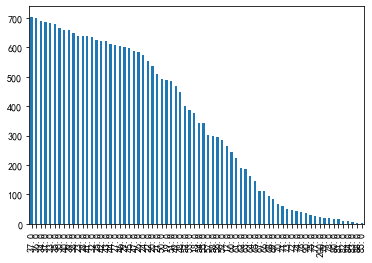

In [5]:
data['age'].value_counts().plot(kind = "bar")
data['age'].value_counts()


In [6]:
data['age'][data['age'].isnull()] = 37.0

C:\Users\Dyj\AppData\Local\Temp/ipykernel_16244/886858051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'][data['age'].isnull()] = 37.0


0

In [7]:
age_max = data['age'].max()
age_min = data['age'].min()
print(age_max)
print(age_min)
print('3sigma max = ',data['age'].mean() + 3 * data['age'].std())

200.0
17.0
3sigma max =  82.23741019648621


C:\Users\Dyj\AppData\Local\Temp/ipykernel_16244/1948081388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'][data['age'] > 82] = 82


<AxesSubplot:>

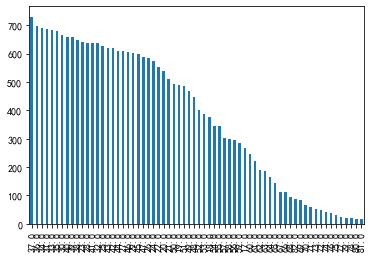

In [8]:
data['age'][data['age'] > 82] = 82
data['age'].value_counts().plot(kind = 'bar')

In [9]:
age_max = data['age'].max()
age_min = data['age'].min()
print(age_max)
print(age_min)
print('3sigma max = ',data['age'].mean() + 3 * data['age'].std())

82.0
17.0
3sigma max =  79.74432864595538


## workclass 工作类型   

C:\Users\Dyj\AppData\Local\Temp/ipykernel_16244/3542914462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['workclass'][data['workclass'] ==  'Without-pay'] = 'Federal-gov'
C:\Users\Dyj\AppData\Local\Temp/ipykernel_16244/3542914462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['workclass'][data['workclass'] ==  'Never-worked'] = 'Federal-gov'


<AxesSubplot:>

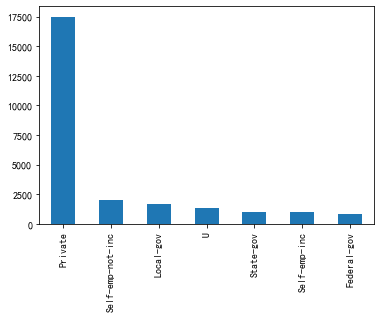

In [10]:
data['workclass'][data['workclass'] ==  'Without-pay'] = 'Federal-gov'
data['workclass'][data['workclass'] ==  'Never-worked'] = 'Federal-gov'
data['workclass'].fillna('U',inplace = True)
data['workclass'].value_counts().plot(kind = 'bar')

In [11]:
data['workclass_first'] = data['workclass'].str[0]

In [12]:
work_oh = pd.get_dummies(data['workclass_first'],prefix = 'workclass')
work_oh.head()

,workclass_F,workclass_L,workclass_P,workclass_S,workclass_U
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


## education_num 受教育时间 

In [13]:
data['education-num'].value_counts()

9.0     7955
10.0    5596
13.0    4463
14.0    1497
11.0    1081
7.0      850
12.0     806
6.0      674
15.0     528
4.0      458
16.0     381
5.0      367
8.0      299
3.0      234
2.0      113
1.0       33
Name: education-num, dtype: int64

In [14]:
data['education-num'].fillna('17.0',inplace = True)
data['education-num'].value_counts()

9.0     7955
10.0    5596
13.0    4463
14.0    1497
11.0    1081
7.0      850
12.0     806
6.0      674
15.0     528
4.0      458
16.0     381
5.0      367
8.0      299
3.0      234
2.0      113
1.0       33
17.0      16
Name: education-num, dtype: int64

## maritial_status 婚姻状况  

,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,predclass,workclass_first,marital-status-f
0,39.0,State-gov,77516,13.0,Never-married,Not-in-family,White,Male,2174,0,40,0,S,N
1,50.0,Self-emp-not-inc,83311,13.0,Married-civ-spouse,Husband,White,Male,0,0,13,0,S,M
2,38.0,Private,215646,9.0,Divorced,Not-in-family,White,Male,0,0,40,0,P,D
3,53.0,Private,234721,7.0,Married-civ-spouse,Husband,Black,Male,0,0,40,0,P,M
4,28.0,Private,338409,13.0,Married-civ-spouse,Wife,Black,Female,0,0,40,0,P,M


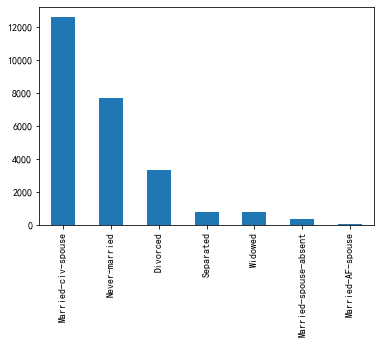

In [27]:
data['marital-status'].value_counts().plot(kind = 'bar')
data['marital-status-f'] = data['marital-status'].str[0]   #str[0]   第一个字母
data.head()

In [28]:
data['marital-status-f'].value_counts()


M    12885
N     7686
D     3311
S      736
W      733
Name: marital-status-f, dtype: int64

In [29]:
mar_oh = pd.get_dummies(data['marital-status-f'],prefix = 'smarital-status')  
mar_oh.head()

,smarital-status_D,smarital-status_M,smarital-status_N,smarital-status_S,smarital-status_W
0,0,0,1,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


Text(0.5, 1.0, '工资小于等于50k：婚姻状况分布')

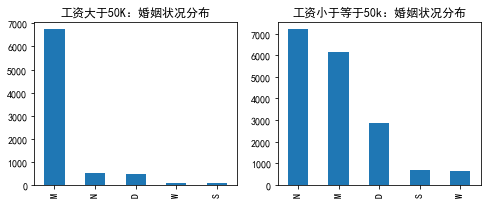

In [24]:
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
data['marital-status-f'][data['predclass'] == 1].value_counts().plot(kind = 'bar')
plt.title(u"工资大于50K：婚姻状况分布")
plt.subplot(1,2,2)
data['marital-status-f'][data['predclass'] == 0].value_counts().plot(kind = 'bar')
plt.title(u"工资小于等于50k：婚姻状况分布")

##  race 种族

White                 21788
Black                  2307
Asian-Pac-Islander      810
Amer-Indian-Eskimo      236
Other                   207
Name: race, dtype: int64

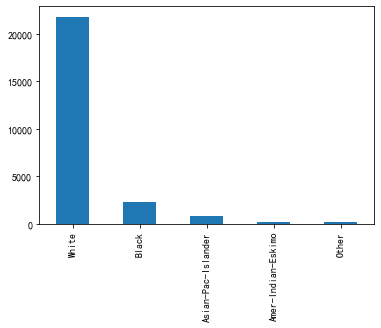

In [22]:
data['race'].value_counts().plot(kind = 'bar')
data['race'].value_counts()

Text(0.5, 1.0, '工资小于等于50k：种族分布')

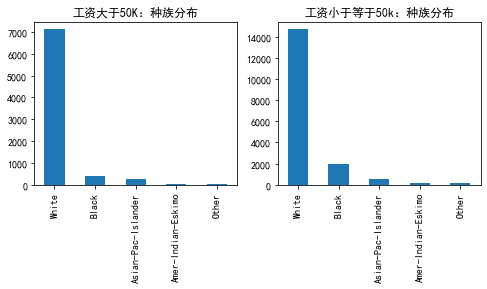

In [30]:
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
data['race'][data['predclass'] == 1].value_counts().plot(kind = 'bar')
plt.title(u"工资大于50K：种族分布")
plt.subplot(1,2,2)
data['race'][data['predclass'] == 0].value_counts().plot(kind = 'bar')
plt.title(u"工资小于等于50k：种族分布")

In [31]:
race_oh = pd.get_dummies(data['race'],prefix = 'race')
race_oh.head()

,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


## sex 性别

In [32]:
#将空的性别填充为other
data['sex'].fillna('other',inplace= True)
data['sex'].value_counts()

Male      17387
Female     7948
other        16
Name: sex, dtype: int64

In [33]:
data['sex'][data['sex'] ==  'other'] = 'Male'
data['sex'].value_counts()

C:\Users\Dyj\AppData\Local\Temp/ipykernel_16244/3466396846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'][data['sex'] ==  'other'] = 'Male'


Male      17403
Female     7948
Name: sex, dtype: int64

Text(0.5, 1.0, '工资小于等于50k：性别分布')

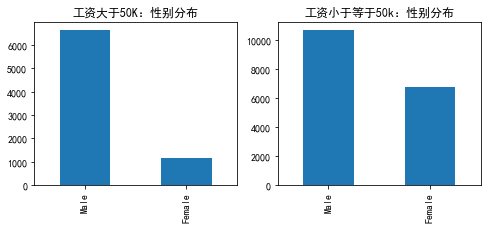

In [34]:
#性别和收入的关系
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
data['sex'][data['predclass'] == 1].value_counts().plot(kind = 'bar')
plt.title(u"工资大于50K：性别分布")
plt.subplot(1,2,2)
data['sex'][data['predclass'] == 0].value_counts().plot(kind = 'bar')
plt.title(u"工资小于等于50k：性别分布")

In [35]:
# 对性别进行  独热处理 pd.get_dummies   prefix 前缀
sex_oh = pd.get_dummies(data['sex'],prefix = 'sex')   #   将原来的两列扩展为Sex_female  Sex_male
#DataFrame  类型
# 处理完后一起拼接起来
sex_oh.head()

,sex_Female,sex_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


## hours_per_week 每周工作小时数    

<AxesSubplot:>

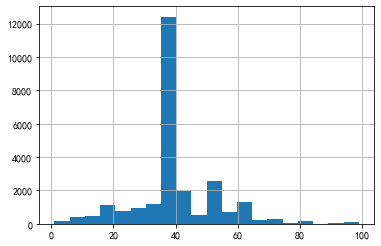

In [22]:
data['hours-per-week'].value_counts()
data['hours-per-week'].hist(bins = 20)


In [23]:

print('3sigma max = ',data['hours-per-week'].mean() + 3 * data['hours-per-week'].std())
print('3sigma min = ',data['hours-per-week'].mean() - 3 * data['hours-per-week'].std())

3sigma max =  77.7842531243922
3sigma min =  4.020882767683062


In [45]:
data['hours-per-week'][data['hours-per-week'] > 78]
data['hours-per-week'][data['hours-per-week'] < 4]

77       2
157      2
189      1
1034     2
1036     1
        ..
22951    3
22960    1
24117    3
24677    2
25050    2
Name: hours-per-week, Length: 70, dtype: int64

In [24]:
data['hours-per-week'][data['hours-per-week'] > 78] = 78    #将大于200的数据改为200
data['hours-per-week'][data['hours-per-week'] < 4] = 4 
data['hours-per-week'].value_counts()

C:\Users\Dyj\AppData\Local\Temp/ipykernel_12948/4010539477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hours-per-week'][data['hours-per-week'] > 78] = 78    #将大于200的数据改为200
C:\Users\Dyj\AppData\Local\Temp/ipykernel_12948/4010539477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hours-per-week'][data['hours-per-week'] < 4] = 4


40    11725
50     2368
45     1489
60     1243
35      971
      ...  
67        3
31        2
73        2
76        2
61        2
Name: hours-per-week, Length: 72, dtype: int64

<AxesSubplot:>

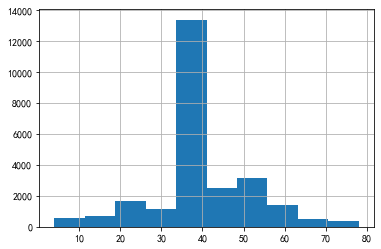

In [90]:
data['hours-per-week'].hist()

## predclass 收入

In [20]:
data['predclass'].value_counts()

0    17510
1     7841
Name: predclass, dtype: int64

In [19]:
data['predclass'][data['predclass'] == '<=50K'] = 0
data['predclass'][data['predclass'] == '>50K'] = 1
data.head(10)

C:\Users\Dyj\AppData\Local\Temp/ipykernel_16244/4063893480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predclass'][data['predclass'] == '<=50K'] = 0
C:\Users\Dyj\AppData\Local\Temp/ipykernel_16244/4063893480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predclass'][data['predclass'] == '>50K'] = 1


,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,predclass,workclass_first,marital-status-f
0,39.0,State-gov,77516,13.0,Never-married,Not-in-family,White,Male,2174,0,40,0,S,N
1,50.0,Self-emp-not-inc,83311,13.0,Married-civ-spouse,Husband,White,Male,0,0,13,0,S,M
2,38.0,Private,215646,9.0,Divorced,Not-in-family,White,Male,0,0,40,0,P,D
3,53.0,Private,234721,7.0,Married-civ-spouse,Husband,Black,Male,0,0,40,0,P,M
4,28.0,Private,338409,13.0,Married-civ-spouse,Wife,Black,Female,0,0,40,0,P,M
5,37.0,Private,284582,14.0,Married-civ-spouse,Wife,White,Female,0,0,40,0,P,M
6,49.0,Private,160187,5.0,Married-spouse-absent,Not-in-family,Black,Female,0,0,16,0,P,M
7,52.0,Self-emp-not-inc,209642,9.0,Married-civ-spouse,Husband,White,Male,0,0,45,1,S,M
8,31.0,Private,45781,14.0,Never-married,Not-in-family,White,Female,14084,0,50,1,P,N
9,42.0,Private,159449,13.0,Married-civ-spouse,Husband,White,Male,5178,0,40,1,P,M


<AxesSubplot:>

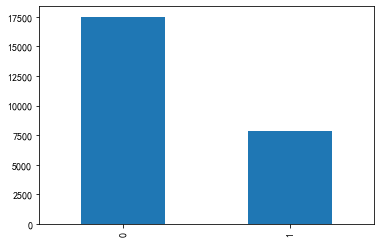

In [21]:
data['predclass'].value_counts().plot(kind = 'bar')

In [25]:
y = data['predclass']
y.shape

(25351,)

In [34]:
list(data)


['age',
 'workclass',
 'fnlwgt',
 'education-num',
 'marital-status',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'predclass',
 'workclass_first',
 'marital-status-f']

In [79]:
X = pd.concat([data[['age','hours-per-week']],sex_oh,work_oh,mar_oh,race_oh],axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25351 entries, 0 to 25350
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      25351 non-null  float64
 1   hours-per-week           25351 non-null  int64  
 2   sex_Female               25351 non-null  uint8  
 3   sex_Male                 25351 non-null  uint8  
 4   workclass_F              25351 non-null  uint8  
 5   workclass_L              25351 non-null  uint8  
 6   workclass_P              25351 non-null  uint8  
 7   workclass_S              25351 non-null  uint8  
 8   workclass_U              25351 non-null  uint8  
 9   smarital-status_D        25351 non-null  uint8  
 10  smarital-status_M        25351 non-null  uint8  
 11  smarital-status_N        25351 non-null  uint8  
 12  smarital-status_S        25351 non-null  uint8  
 13  smarital-status_W        25351 non-null  uint8  
 14  race_Amer-Indian-Eskim

## 训练集测试集拆分

In [37]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y              #需要拆分的数据
                                                ,test_size = 0.2  #测试集的比例
                                                ,random_state = 666     #随机种子，保证数据拆分每次运行都是一样的
                                                )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20280, 19), (5071, 19), (20280,), (5071,))

In [53]:
X.head()

,age,hours-per-week,sex_Female,sex_Male,workclass_F,workclass_L,workclass_P,workclass_S,workclass_U,smarital-status_D,smarital-status_M,smarital-status_N,smarital-status_S,smarital-status_W,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39.0,40,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,50.0,13,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,38.0,40,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,53.0,40,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,28.0,40,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [79]:
type(X)

pandas.core.frame.DataFrame

In [38]:
# (4) 特征数据标准化 
from sklearn.preprocessing import StandardScaler   # z-score标准化

In [39]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [68]:
X_train_std = sc.transform(X_train)    #transform 数据转换
X_test_std = sc.transform(X_test)


In [69]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20280, 19), (5071, 19), (20280,), (5071,))

In [73]:
y_train = y_train.astype('int')
X_train_std = X_train_std.astype('int')
X_test_std = X_test_std.astype('int')
y_test = y_test.astype('int')

In [41]:
# 导入Sklearn的算法包： 逻辑回归、SVM、决策树、集成方法随机森林
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 导入评价指标：分类报告，精度
from sklearn.metrics import classification_report, accuracy_score 

In [75]:
from sklearn.metrics import confusion_matrix
# 1、模型初始化
lgr = LogisticRegression()

# 2. 训练
lgr.fit(X_train_std,y_train)

# 3. 预测
y_train_pred = lgr.predict(X_train_std)
y_test_pred = lgr.predict(X_test_std)



# 4. 查看评价指标 
print('逻辑回归--训练集分类报告：\n',classification_report(y_train,y_train_pred))   
print('\n测试集上的分类报告：\n',classification_report(y_test,y_test_pred))

逻辑回归--训练集分类报告：
               precision    recall  f1-score   support

           0       0.77      0.86      0.82     14057
           1       0.58      0.43      0.49      6223

    accuracy                           0.73     20280
   macro avg       0.68      0.65      0.66     20280
weighted avg       0.72      0.73      0.72     20280


测试集上的分类报告：
               precision    recall  f1-score   support

           0       0.77      0.87      0.82      3453
           1       0.62      0.44      0.51      1618

    accuracy                           0.73      5071
   macro avg       0.69      0.66      0.66      5071
weighted avg       0.72      0.73      0.72      5071



In [76]:
from sklearn import tree#导入模块
dt = DecisionTreeClassifier(max_depth = 6)
#训练
dt.fit(X_train_std,y_train)
#预测
y_train_pred = dt.predict(X_train_std)
y_test_pred = dt.predict(X_test_std)
#查看评价指标
print('决策树--训练集分类报告：\n',classification_report(y_train,y_train_pred))
print('决策树--测试集分类报告：\n',classification_report(y_test,y_test_pred))

决策树--训练集分类报告：
               precision    recall  f1-score   support

           0       0.87      0.74      0.80     14057
           1       0.56      0.75      0.64      6223

    accuracy                           0.75     20280
   macro avg       0.72      0.75      0.72     20280
weighted avg       0.78      0.75      0.75     20280

决策树--测试集分类报告：
               precision    recall  f1-score   support

           0       0.87      0.75      0.81      3453
           1       0.59      0.77      0.67      1618

    accuracy                           0.76      5071
   macro avg       0.73      0.76      0.74      5071
weighted avg       0.78      0.76      0.76      5071



In [85]:
# 以逻辑回归为例
# 取特征的名称
X.keys()

# 逻辑回归变量的w，权重
bar_x = list(X)
bar_y = lgr.coef_[0]
print(bar_x,'\n', bar_y)

['age', 'hours-per-week', 'sex_Female', 'sex_Male', 'workclass_F', 'workclass_L', 'workclass_P', 'workclass_S', 'workclass_U', 'smarital-status_D', 'smarital-status_M', 'smarital-status_N', 'smarital-status_S', 'smarital-status_W', 'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White'] 
 [ 0.31360343  0.39629843 -0.1120732   0.1120732   0.15222898  0.09396677
 -0.03914772  0.05713123 -0.20474379 -0.25313822  1.27605946 -1.08992571
 -0.16181979 -0.1360034  -0.27486125 -0.38436678 -0.76935363 -0.30818965
 -0.92843456]


In [84]:
type(bar_y)

numpy.ndarray

Text(0.5, 1.0, '逻辑回归各变量的权重值')

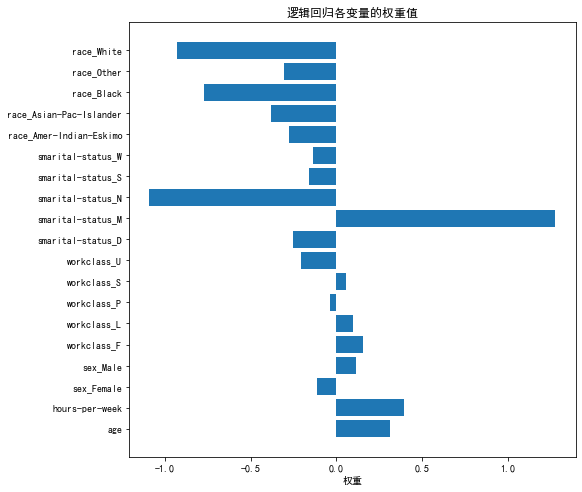

In [86]:
plt.figure(figsize=(8,8))
plt.barh(bar_x,bar_y)  # 水平柱状图  plt.barh()
plt.xlabel('权重')
plt.title('逻辑回归各变量的权重值')